# Set up


Datasource : https://mmspg.epfl.ch/downloads/food-image-datasets/

In [1]:
!wget --passive-ftp --ftp-user FoodImage@grebvm2.epfl.ch --ftp-password Cahc1moo ftp://tremplin.epfl.ch/Food-5K.zip

--2019-06-05 04:59:04--  ftp://tremplin.epfl.ch/Food-5K.zip
           => ‘Food-5K.zip’
Resolving tremplin.epfl.ch (tremplin.epfl.ch)... 128.178.50.75, 2001:620:618:132:1:80b2:324b:1
Connecting to tremplin.epfl.ch (tremplin.epfl.ch)|128.178.50.75|:21... connected.
Logging in as FoodImage@grebvm2.epfl.ch ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD not needed.
==> SIZE Food-5K.zip ... 446919921
==> PASV ... done.    ==> RETR Food-5K.zip ... done.
Length: 446919921 (426M) (unauthoritative)

Food-5K.zip         100%[===================>] 426.22M  19.4MB/s    in 29s     

2019-06-05 04:59:35 (14.8 MB/s) - ‘Food-5K.zip’ saved [446919921]



In [2]:
!unzip Food-5K.zip

Archive:  Food-5K.zip
   creating: evaluation/
  inflating: evaluation/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/evaluation/
  inflating: __MACOSX/evaluation/._.DS_Store  
  inflating: evaluation/0_0.jpg      
  inflating: evaluation/0_1.jpg      
  inflating: evaluation/0_10.jpg     
  inflating: evaluation/0_100.jpg    
  inflating: evaluation/0_101.jpg    
  inflating: evaluation/0_102.jpg    
  inflating: evaluation/0_103.jpg    
  inflating: evaluation/0_104.jpg    
  inflating: evaluation/0_105.jpg    
  inflating: evaluation/0_106.jpg    
  inflating: evaluation/0_107.jpg    
  inflating: evaluation/0_108.jpg    
  inflating: evaluation/0_109.jpg    
  inflating: evaluation/0_11.jpg     
  inflating: evaluation/0_110.jpg    
  inflating: evaluation/0_111.jpg    
  inflating: evaluation/0_112.jpg    
  inflating: evaluation/0_113.jpg    
  inflating: evaluation/0_114.jpg    
  inflating: evaluation/0_115.jpg    
  inflating: evaluation/0_116.jpg    
  inflating: 

In [0]:
!mkdir dataset

In [0]:
training_data_path = 'training/*'
validation_data_path = 'validation/*'
evaluation_data_path = 'evaluation/*'


base_path = 'dataset'

In [0]:
import shutil
import os
import glob

In [0]:
def make_dataset():
    """Function to make the dataset."""
    for i in [training_data_path, validation_data_path, evaluation_data_path]:
        print('Reading {}'.format(i))
        img_paths = glob.glob(i)
        # print(img_paths[0])
        for files in img_paths:
            main_path = files.split('/')[0]
            file_name = files.split('/')[1]
            label = files.split('/')[1][0]
            # print(label)
            new_path = os.path.sep.join([base_path, main_path])
            if not os.path.exists(new_path):
                os.mkdir(new_path)
            # print(new_path)
            if label == '1':
                new_path = os.path.sep.join([new_path, 'food'])
                if not os.path.exists(new_path):
                    os.mkdir(new_path)
                # print(new_path)
                f_name = os.path.sep.join([new_path, file_name])
                shutil.move(files, f_name)
                # print('moved')
            elif label == '0':
                new_path = os.path.sep.join([new_path, 'not_food'])
                if not os.path.exists(new_path):
                    os.mkdir(new_path)
                # print(new_path)
                f_name = os.path.sep.join([new_path, file_name])
                shutil.move(files, f_name)
                # print('moved')
                # print(new_path)
            # break
        # break

In [17]:
make_dataset()

Reading training/*
Reading validation/*
Reading evaluation/*


In [0]:
# !mkdir dataset/training/food
# !mv dataset/training/not_food/1_1481.jpg dataset/training/food/1_1481.jpg
# !mv dataset/training/not_food/1_522.jpg dataset/training/food/1_522.jpg

# Feature Extraction

In [0]:
from sklearn.preprocessing import LabelEncoder

from keras.applications import VGG16, imagenet_utils
from keras.preprocessing.image import img_to_array, load_img

import numpy as np
import pickle
import random
import os

Using TensorFlow backend.


# VGG16

In [0]:
model = VGG16(weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 6s 0us/step


In [0]:
dataset_path = 'dataset/*/*/*'

img_paths = glob.glob(dataset_path)
img_paths[:5]

['dataset/evaluation/food/1_17.jpg',
 'dataset/evaluation/food/1_206.jpg',
 'dataset/evaluation/food/1_217.jpg',
 'dataset/evaluation/food/1_250.jpg',
 'dataset/evaluation/food/1_26.jpg']

In [0]:
np.random.seed(0)
np.random.shuffle(img_paths)

In [0]:
labels = [int(p.split('/')[-1].split('_')[0]) for p in img_paths]
labels[:5]

[1, 0, 0, 0, 0]

In [0]:
labels[-5:]

[0, 0, 1, 0, 0]

In [0]:
# lable encoder
le = LabelEncoder()
le.fit(labels)

LabelEncoder()

In [0]:
img_paths[:5]

['dataset/evaluation/food/1_462.jpg',
 'dataset/training/not_food/0_257.jpg',
 'dataset/validation/not_food/0_391.jpg',
 'dataset/validation/not_food/0_269.jpg',
 'dataset/evaluation/not_food/0_346.jpg']

In [0]:
# looping over images in batches

for folders in ('dataset/training/*/*', 'dataset/evaluation/*/*', 'dataset/validation/*/*'):
  img_paths = glob.glob(folders)
  for (b, i) in enumerate(range(0, len(img_paths), 32)):
    print("preprocessing batch {} / {}".format(b + 1, int(np.ceil(len(img_paths) / float(32)))))
    batch_paths = img_paths[i: i + 32]
    batch_labels = le.transform(labels[i: i+32])
    batch_images = []
    for img_path in batch_paths:
      img = load_img(img_path, target_size=(224, 224))
      img = img_to_array(img)
      img = np.expand_dims(img, axis=0)
      img = imagenet_utils.preprocess_input(img)
      batch_images.append(img)
    batch_images = np.vstack(batch_images)
    features = model.predict(batch_images, batch_size=32)
    features = features.reshape((features.shape[0], 7 * 7 * 512))
    # loop over the class labels and features
    with open('{}.csv'.format(folders.split('/')[1]), 'a') as f:
      for (label, vec) in zip(batch_labels, features):
        vec = ','.join([str(v) for v in vec])
        f.write('{},{}\n'.format(label, vec))

In [0]:
with open('le_file', 'wb') as f:
  f.write(pickle.dumps(le))

## Training

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import pickle
import os

In [0]:
def load_data_split(split_path):
  """Function to load data and labels."""
  data = []
  labels = [] 
  
  # loop over the rows in the data split file
  with open(split_path, 'r') as f:
    for row in f:
      row = row.strip().split(",")
      label = row[0]
      features = np.array(row[1:], dtype="float")
      data.append(features)
      labels.append(label)
  data = np.array(data)
  labels = np.array(labels)
  
  return (data, labels)

In [0]:
(x_train, y_train) = load_data_split('training.csv')

In [0]:
(x_test, y_test) = load_data_split('validation.csv')

In [0]:
x_train.shape, y_train.shape

((3000, 25088), (3000,))

In [0]:
x_test.shape, y_test.shape

((1000, 25088), (1000,))

In [0]:
le = pickle.loads(open('le_file', 'rb').read())

##Logistic Regression from sklearn

In [0]:
model = LogisticRegression(solver='lbfgs', multi_class="auto")

In [0]:
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
preds = model.predict(x_test)

In [0]:
le.classes_

array([0, 1])

In [0]:
print(classification_report(y_test, preds, target_names=['not_food', 'food']))

              precision    recall  f1-score   support

    not_food       0.52      0.45      0.49       520
        food       0.48      0.55      0.52       480

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



## Neural Networks

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout, Flatten

In [0]:
from keras.utils import to_categorical

In [0]:
def build_model():
  """Function to build the model."""
  
  input_ = Input(shape=x_train.shape[1:], name="input_shape_1")
  
  x = Dense(64, name="Dense_1")(input_)
  x = Activation('elu', name="activation_1")(x)
 
  x = Dense(32, name="Dense_2")(x)
  x = Activation('relu', name="activation_2")(x)
  
  x = Dense(2, name="prediction_layer")(x)
  out = Activation('softmax', name="prediction_activation")(x)
  
  model = Model(
      inputs=[input_],
      outputs=[out]
  )
  model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
  return model  

In [0]:
net = build_model()
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape_1 (InputLayer)   (None, 25088)             0         
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                1605696   
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
Dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
prediction_layer (Dense)     (None, 2)                 66        
_________________________________________________________________
prediction_activation (Activ (None, 2)                 0         
Total para

In [0]:
h = net.fit(
    x_train, to_categorical(y_train, num_classes=2),
    epochs=10,
    validation_data=(x_test, to_categorical(y_test, num_classes=2)),
    verbose=2
)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
 - 2s - loss: 8.0057 - acc: 0.4970 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 2/10
 - 1s - loss: 8.0098 - acc: 0.5003 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 3/10
 - 1s - loss: 8.0098 - acc: 0.5003 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 4/10
 - 1s - loss: 8.0098 - acc: 0.5003 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 5/10
 - 1s - loss: 8.0098 - acc: 0.5003 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 6/10
 - 1s - loss: 8.0098 - acc: 0.5003 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 7/10
 - 1s - loss: 8.0098 - acc: 0.5003 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 8/10
 - 1s - loss: 8.0098 - acc: 0.5003 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 9/10
 - 1s - loss: 8.0098 - acc: 0.5003 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 10/10
 - 1s - loss: 8.0098 - acc: 0.5003 - val_loss: 8.3357 - val_acc: 0.4800


# ResNET50

In [0]:
from keras.applications import ResNet50

In [0]:
model = ResNet50(weights='imagenet', include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 8s 0us/step


In [0]:
# looping over images in batches

for folders in ('dataset/training/*/*', 'dataset/evaluation/*/*', 'dataset/validation/*/*'):
  img_paths = glob.glob(folders)
  for (b, i) in enumerate(range(0, len(img_paths), 32)):
    print("preprocessing batch {} / {}".format(b + 1, int(np.ceil(len(img_paths) / float(32)))))
    batch_paths = img_paths[i: i + 32]
    batch_labels = le.transform(labels[i: i+32])
    batch_images = []
    for img_path in batch_paths:
      img = load_img(img_path, target_size=(224, 224))
      img = img_to_array(img)
      img = np.expand_dims(img, axis=0)
      img = imagenet_utils.preprocess_input(img)
      batch_images.append(img)
    batch_images = np.vstack(batch_images)
    features = model.predict(batch_images, batch_size=32)
    features = features.reshape((features.shape[0], 7 * 7 * 2048))
    # loop over the class labels and features
    with open('resnet_{}.csv'.format(folders.split('/')[1]), 'a') as f:
      for (label, vec) in zip(batch_labels, features):
        vec = ','.join([str(v) for v in vec])
        f.write('{},{}\n'.format(label, vec))

## online training

In [0]:
from keras.models import Sequential
from keras.optimizers import SGD

In [0]:
with open('resnet_training.csv', 'r') as f:
  for line in f:
    print(line)
    break

1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.511506,0.0,0.0,0.0,0.0,0.0,1.4323986,0.0,0.37949145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.812451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0056653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9568697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.147165,0.0,0.0,0.0,5.0339527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16484022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1429095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5599728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
def feature_gen(input_path, num_classes=2, mode="train", bs=32):
  """Function to create a generator."""
  with open(input_path, 'r') as f:
    while True:
      data = []
      labels = []
      tmp = []       
      while len(data) < bs:
        row = f.readline()
        if row == "":
          f.seek(0)
          row = f.readline()
          if mode == "eval":
            break
        row = row.strip().split(",")
        label = row[0]
        label = to_categorical(label, num_classes=num_classes)
        features = np.array(row[1:], dtype="float")
        data.append(features)
        labels.append(label)
      yield (np.array(data), np.array(labels))

In [0]:
train_gen = feature_gen('resnet_training.csv', 2, "train", 32)
val_gen = feature_gen('resnet_validation.csv', 2, "val", 32)
test_gen = feature_gen('resnet_evaluation.csv', 2, 'eval', 32)

In [0]:
def build_model():
  """Function to build model."""
  
  input_ = Input(shape=(7*7*2048, ), name="input_1")
  
  x = Dense(256, activation="relu", name="dense_1")(input_)
  x = Dense(16, activation="relu", name="dense_2")(x)
  out = Dense(2, activation='softmax', name="predicted_dense")(x)
  
  model = Model(
      inputs=[input_],
      outputs=[out]
  )
  opt = SGD(lr=1e-3, momentum=0.9, decay=1e-3/25)
  model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
  return model

In [0]:
resnet_net = build_model()

In [0]:
H = resnet_net.fit_generator(
    train_gen,
    steps_per_epoch=len(x_train) // 32,
    validation_data=val_gen,
    validation_steps=len(x_test) // 32,
    epochs=25,
    verbose=2
)

Epoch 1/25
 - 80s - loss: 0.7006 - acc: 0.5081 - val_loss: 0.6944 - val_acc: 0.4839
Epoch 2/25
 - 71s - loss: 0.6672 - acc: 0.5769 - val_loss: 0.6967 - val_acc: 0.4889
Epoch 3/25
 - 71s - loss: 0.6023 - acc: 0.6566 - val_loss: 0.8936 - val_acc: 0.5091
Epoch 4/25
 - 71s - loss: 0.6206 - acc: 0.5880 - val_loss: 0.7206 - val_acc: 0.5181
Epoch 5/25
 - 71s - loss: 0.4585 - acc: 0.7782 - val_loss: 0.8141 - val_acc: 0.5252
Epoch 6/25
 - 71s - loss: 0.3335 - acc: 0.8585 - val_loss: 0.8774 - val_acc: 0.5202
Epoch 7/25
 - 70s - loss: 0.2314 - acc: 0.9093 - val_loss: 1.6570 - val_acc: 0.4919
Epoch 8/25
 - 70s - loss: 0.4615 - acc: 0.8095 - val_loss: 1.1378 - val_acc: 0.5161
Epoch 9/25
 - 70s - loss: 0.3391 - acc: 0.8515 - val_loss: 1.9597 - val_acc: 0.5101
Epoch 10/25
 - 70s - loss: 0.2765 - acc: 0.8847 - val_loss: 1.5438 - val_acc: 0.5060
Epoch 11/25
 - 70s - loss: 0.0899 - acc: 0.9624 - val_loss: 2.0884 - val_acc: 0.5131
Epoch 12/25
 - 70s - loss: 0.0715 - acc: 0.9778 - val_loss: 1.8923 - val_a

In [0]:
preds = resnet_net.predict_generator(
    test_gen,
    steps=(len(x_test) // 32) + 1
)

In [0]:
pred_idx = np.argmax(preds, axis=1)

In [0]:
testLabels = [int(row.split(",")[0]) for row in open('resnet_evaluation.csv', 'r')]
print(classification_report(testLabels, pred_idx, target_names=['not_food', 'food']))

              precision    recall  f1-score   support

    not_food       0.52      0.57      0.55       520
        food       0.49      0.44      0.46       480

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.51      1000



# Custom Network

##Set up

In [4]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout, Input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [0]:
from keras.utils import to_categorical, plot_model

## Dataprocessing

In [0]:
img_paths = glob.glob('dataset/*/*/*')

np.random.seed(0)
np.random.shuffle(img_paths)

In [19]:
img_paths[:5]

['dataset/training/food/1_890.jpg',
 'dataset/validation/not_food/0_161.jpg',
 'dataset/evaluation/not_food/0_229.jpg',
 'dataset/evaluation/not_food/0_119.jpg',
 'dataset/training/food/1_1355.jpg']

In [20]:
data = []
labels = []

for img_path in img_paths:
  img = cv2.imread(img_path)
  img = cv2.resize(img, (32, 32))
  img = img_to_array(img)
  data.append(img)
  
  if img_path.split('/')[-1].split('_')[0] == '1':
    labels.append(1)
  else:
    labels.append(0)

data = np.array(data, dtype=np.float64) / 255.0
labels = to_categorical(np.array(labels), num_classes=2)

data.shape, labels.shape

((5000, 32, 32, 3), (5000, 2))

In [0]:
aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 32, 32, 3), (1000, 32, 32, 3), (4000, 2), (1000, 2))

In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3200, 32, 32, 3), (800, 32, 32, 3), (3200, 2), (800, 2))

In [0]:
def custom_model():
  """Function to build model."""
  
  input_ = Input(shape=x_train.shape[1:], name="input_shape_1")
  x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", name="conv_1")(input_)
  
  # First block
  for i in range(2, 5):
    x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", name="conv_{}".format(i))(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="max_pool_{}".format(i - 1))(x)
    x = Activation('relu', name="activation_{}".format(i - 1))(x)
  
  x = Flatten(name="flatten_1")(x)
  x = Dense(128, activation="relu", name="Dense_1")(x)
  
  out = Dense(2, activation="softmax", name="prediction_layer")(x)
  
  model = Model(
      inputs=[input_],
      outputs=[out]
  )
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [29]:
net = custom_model()
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape_1 (InputLayer)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 8, 8, 32)          0         
__________

In [0]:
plot_model(net, to_file="model.png")

In [31]:
H = net.fit_generator(
    aug.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) // 32,
    epochs=25,
    verbose=2,
    shuffle=True
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
 - 7s - loss: 0.5627 - acc: 0.7141 - val_loss: 0.4822 - val_acc: 0.7675
Epoch 2/25
 - 1s - loss: 0.4811 - acc: 0.7812 - val_loss: 0.4663 - val_acc: 0.7900
Epoch 3/25
 - 2s - loss: 0.4478 - acc: 0.7969 - val_loss: 0.3868 - val_acc: 0.8375
Epoch 4/25
 - 2s - loss: 0.4219 - acc: 0.8213 - val_loss: 0.3241 - val_acc: 0.8638
Epoch 5/25
 - 2s - loss: 0.3905 - acc: 0.8325 - val_loss: 0.3263 - val_acc: 0.8688
Epoch 6/25
 - 2s - loss: 0.3920 - acc: 0.8287 - val_loss: 0.3545 - val_acc: 0.8525
Epoch 7/25
 - 2s - loss: 0.3693 - acc: 0.8400 - val_loss: 0.2721 - val_acc: 0.8888
Epoch 8/25
 - 2s - loss: 0.3453 - acc: 0.8491 - val_loss: 0.3063 - val_acc: 0.8712
Epoch 9/25
 - 2s - loss: 0.3322 - acc: 0.8578 - val_loss: 0.2900 - val_acc: 0.8875
Epoch 10/25
 - 2s - loss: 0.3328 - acc: 0.8591 - val_loss: 0.3295 - val_acc: 0.8538
Epoch 11/25
 - 2s - loss: 0.3216 - acc: 0.8628 - val_loss: 0.3254 - val_acc: 0.8738
Epoch 12/25
 - 2s - loss: 0.3347 - ac

In [0]:
def plot_history(H, epochs):
  """Function to plot the history of the training."""
  plt.style.use("ggplot")
  plt.figure(figsize=(9, 6))
  N = epochs
  
  for i in zip(["loss", "val_loss", "acc", "val_acc"], ["train_loss", "val_loss", "train_acc", "val_acc"]):
    plt.plot(np.arange(0, N), H.history[i[0]], label=i[1])

  plt.title("Training Loss and Accuracy on Food / not Food")
  plt.xlabel('Epoch #')
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plt.show()

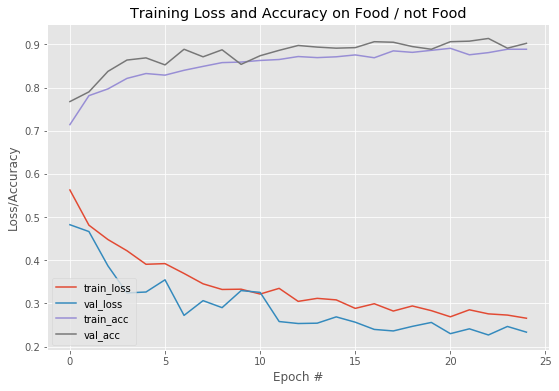

In [35]:
plot_history(H, 25)

lets try with more epochs

In [36]:
H = net.fit_generator(
    aug.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) // 32,
    epochs=25,
    verbose=2,
    shuffle=True
)

Epoch 1/25
 - 1s - loss: 0.2503 - acc: 0.9000 - val_loss: 0.2400 - val_acc: 0.9050
Epoch 2/25
 - 1s - loss: 0.2564 - acc: 0.8909 - val_loss: 0.2457 - val_acc: 0.9038
Epoch 3/25
 - 2s - loss: 0.2637 - acc: 0.8878 - val_loss: 0.2289 - val_acc: 0.9125
Epoch 4/25
 - 2s - loss: 0.2570 - acc: 0.8903 - val_loss: 0.2721 - val_acc: 0.8938
Epoch 5/25
 - 2s - loss: 0.2468 - acc: 0.8994 - val_loss: 0.2561 - val_acc: 0.8975
Epoch 6/25
 - 2s - loss: 0.2571 - acc: 0.8950 - val_loss: 0.2186 - val_acc: 0.9100
Epoch 7/25
 - 2s - loss: 0.2369 - acc: 0.9056 - val_loss: 0.2384 - val_acc: 0.9012
Epoch 8/25
 - 2s - loss: 0.2431 - acc: 0.9025 - val_loss: 0.2358 - val_acc: 0.9087
Epoch 9/25
 - 2s - loss: 0.2311 - acc: 0.9009 - val_loss: 0.2861 - val_acc: 0.8925
Epoch 10/25
 - 2s - loss: 0.2434 - acc: 0.8962 - val_loss: 0.2052 - val_acc: 0.9225
Epoch 11/25
 - 2s - loss: 0.2319 - acc: 0.9053 - val_loss: 0.2327 - val_acc: 0.9012
Epoch 12/25
 - 2s - loss: 0.2204 - acc: 0.9069 - val_loss: 0.2879 - val_acc: 0.9075
E

In [0]:
preds = net.predict(x_test)

In [41]:
y_true = [np.argmax(i) for i in y_test]
y_true[:5]

[0, 0, 0, 1, 0]

In [0]:
y_pred = [np.argmax(i) for i in preds]

In [46]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [47]:
print(classification_report(y_true, y_pred, target_names=['not_food', 'food']))

              precision    recall  f1-score   support

    not_food       0.87      0.96      0.91       498
        food       0.95      0.85      0.90       502

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.90      1000
weighted avg       0.91      0.91      0.90      1000



In [0]:
def test_img(img_file):
  """Function to test image."""
  img = cv2.imread(img_file)
  img = cv2.resize(img, (32, 32))
  img = img_to_array(img)
  img = np.array([img]) / 255.0
  return img

In [49]:
!wget https://i2-prod.mirror.co.uk/incoming/article11654268.ece/ALTERNATES/s615/MAIN-Christmas-Grocery-Shopping-Christmas-Delivery-Slots.jpg
!mv MAIN-Christmas-Grocery-Shopping-Christmas-Delivery-Slots.jpg test.jpg

--2019-06-05 06:14:24--  https://i2-prod.mirror.co.uk/incoming/article11654268.ece/ALTERNATES/s615/MAIN-Christmas-Grocery-Shopping-Christmas-Delivery-Slots.jpg
Resolving i2-prod.mirror.co.uk (i2-prod.mirror.co.uk)... 184.26.80.179
Connecting to i2-prod.mirror.co.uk (i2-prod.mirror.co.uk)|184.26.80.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71883 (70K) [image/jpeg]
Saving to: ‘MAIN-Christmas-Grocery-Shopping-Christmas-Delivery-Slots.jpg’

MAIN-Christmas-Groc 100%[===================>]  70.20K  --.-KB/s    in 0.01s   

2019-06-05 06:14:24 (4.73 MB/s) - ‘MAIN-Christmas-Grocery-Shopping-Christmas-Delivery-Slots.jpg’ saved [71883/71883]



In [50]:
t = test_img('test.jpg')
t.shape

(1, 32, 32, 3)

In [53]:
np.argmax(net.predict(t))

0

In [0]:
import matplotlib.image as mpimg

In [0]:
def plot_img(img_file):
  """Function to plot the image."""
  img = mpimg.imread(img_file)
  plt.imshow(img)
  plt.grid(False)
  plt.show()

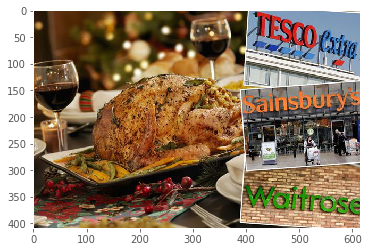

In [59]:
plot_img('test.jpg')

In [68]:
!wget https://resizer.otstatic.com/v2/photos/large/25827783.jpg

--2019-06-05 06:23:46--  https://resizer.otstatic.com/v2/photos/large/25827783.jpg
Resolving resizer.otstatic.com (resizer.otstatic.com)... 23.41.46.235
Connecting to resizer.otstatic.com (resizer.otstatic.com)|23.41.46.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105521 (103K) [image/jpeg]
Saving to: ‘25827783.jpg’

25827783.jpg        100%[===================>] 103.05K  --.-KB/s    in 0.05s   

2019-06-05 06:23:46 (2.04 MB/s) - ‘25827783.jpg’ saved [105521/105521]



In [0]:
!mv 25827783.jpg test1.png

In [70]:
np.argmax(net.predict(test_img('test1.png')))

1

In [0]:
from skimage import io

In [0]:
img = io.imread('test1.png')

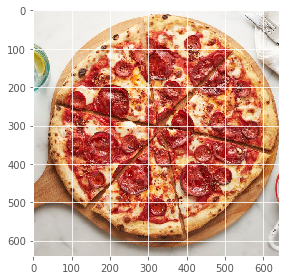

In [74]:
io.imshow(img)

Despite test 1 contains food in it, it does not recognize the image, the second one is correctly recognized

In [75]:
!wget https://images.pexels.com/photos/736230/pexels-photo-736230.jpeg
!mv pexels-photo-736230.jpeg test2.jpeg

--2019-06-05 06:29:36--  https://images.pexels.com/photos/736230/pexels-photo-736230.jpeg
Resolving images.pexels.com (images.pexels.com)... 104.17.209.102, 104.17.208.102, 2606:4700::6811:d066, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.209.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 313675 (306K) [image/jpeg]
Saving to: ‘pexels-photo-736230.jpeg’

pexels-photo-736230 100%[===================>] 306.32K  --.-KB/s    in 0.02s   

2019-06-05 06:29:36 (19.7 MB/s) - ‘pexels-photo-736230.jpeg’ saved [313675/313675]



In [76]:
np.argmax(net.predict(test_img('test2.jpeg')))

0

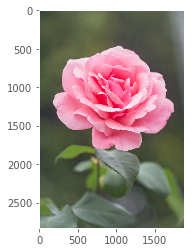

In [77]:
plot_img('test2.jpeg')

okay this is predicted correct